<a href="https://colab.research.google.com/github/Grover1204/Facial-Emotion-Recognition/blob/main/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

In this project, we are working on facial expression recognition using convolutional neural networks.

Facial expression recognition is an important aspect of human and computer interactions, with applications in areas such as robotics and security. The project presents an approach to facial expression recognition using convolutional neural networks.

I installed the Kaggle package to download the dataset of facial data CSV files using the API command for facial expression.

The data consists of 1602 labels of images. In this project, we are identifying 7 different facial expressions. There are a total of 3 columns in the dataset. The first column is emotion, the second column is pixels of images, and the last one is the usage of the dataset.

First, I downloaded the CSV file, which is more than 200 MB, from the Kaggle API command. Then I unzipped the file using the unzip command. After that, I tried to visualize a few sample emotions. I created a variable "emotion_labels" to create a list of emotion labels. Finally, I split the data into x_train, x_test, and y_test, y_train.

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"fdf161c1cce90fcca49c91e278960423"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8564        313  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1222         36  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00       

In [ ]:
! kaggle datasets download -d ahmedmoorsy/facial-expression

facial-expression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip facial-expression.zip

Archive:  facial-expression.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
facial_path = '/content/fer2013/fer2013.csv'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/fer2013/fer2013.csv')


In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
num_classes = 7
width, height = 48, 48

# Prepare input data
pixels = data['pixels'].tolist()
X = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(width, height)
    X.append(face.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

# Prepare target data
y = data['emotion'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


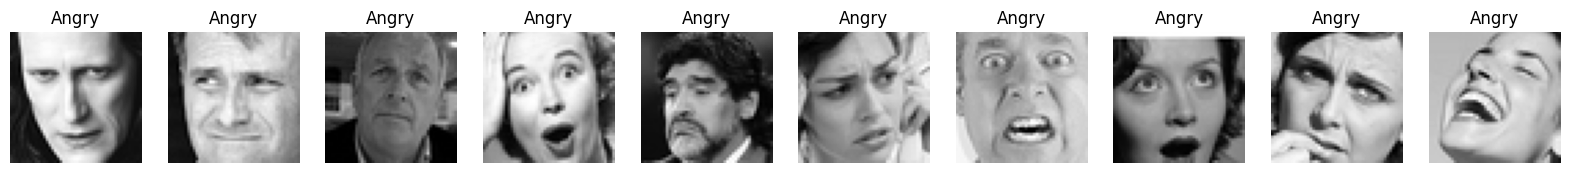

In [ ]:
import matplotlib.pyplot as plt

# Constants
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Function to visualize samples from the dataset
def visualize_data(data, X, y, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    random_indices = np.random.randint(0, len(X), size=num_samples)
    for i, idx in enumerate(random_indices):
        img = X[idx].reshape(48, 48)
        emotion = emotion_labels[np.argmax(y[idx])]
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(emotion)
        axes[i].axis('off')
    plt.show()

# Visualize some samples from the dataset
visualize_data(data, X, y)


In [ ]:
# Data augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_gen.fit(X_train)


For this project, I am using a multi-layer perceptron (MLP) model with the Keras sequential API in TensorFlow.

I am creating a sequential model with a linear stack of layers, including flatten, dense, batch normalization, and dropout.

Flatten is used to convert the input 2D image into a 1D array. This is essential for the MLP process. The dense fully connected layer has 512 units and uses the ReLU activation function.

Batch normalization helps to improve training speed and reduce the sensitivity of weights.

The dropout layer is used to prevent overfitting. It will drop out a few neurons randomly to help the model learn more accurately.

The compile function helps the model by specifying that the optimizer is Adam, the loss function is sparse categorical cross-entropy, and the evaluation metric is accuracy.

The model has a total of around 1,316,359 parameters, with 1,314,823 being trainable parameters and 1,536 non-trainable parameters.

The activation function used here is ReLU. This function is responsible for determining the output. ReLU is a popular choice for an activation function in deep learning and is very effective and efficient. ReLU has several advantages, such as non-linearity, computational efficiency, and sparse activation (many neuron outputs are 0).

The softmax activation function is typically used in the output layer. Softmax converts the raw output of the neural network into a probability over classes because we are dealing with a multi-class classification problem.

The batch size is 64. During training, the model processes the dataset in batches, updating the weights. Making the data into smaller batches requires less memory and increases accuracy but slows down getting results.

We are training for 50 epochs. An epoch is a complete iteration through the entire dataset during training. Here, we are processing the data 50 times.






In [ ]:
# Define the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(width, height, 1)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1180160   
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
batch_size = 64
# run for 50 epochs
epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/10
505/505 [==============================] - 16s 29ms/step - loss: 2.0994 - accuracy: 0.2570 - val_loss: 1.7386 - val_accuracy: 0.3098
Epoch 2/10
505/505 [==============================] - 14s 28ms/step - loss: 1.7406 - accuracy: 0.3135 - val_loss: 1.7101 - val_accuracy: 0.3199
Epoch 3/10
505/505 [==============================] - 14s 28ms/step - loss: 1.6942 - accuracy: 0.3340 - val_loss: 1.8548 - val_accuracy: 0.2926
Epoch 4/10
505/505 [==============================] - 15s 29ms/step - loss: 1.6950 - accuracy: 0.3290 - val_loss: 1.7866 - val_accuracy: 0.2524
Epoch 5/10
505/505 [==============================] - 14s 28ms/step - loss: 1.6850 - accuracy: 0.3322 - val_loss: 1.6881 - val_accuracy: 0.3302
Epoch 6/10
505/505 [==============================] - 14s 28ms/step - loss: 1.6723 - accuracy: 0.3406 - val_loss: 1.6819 - val_accuracy: 0.3514
Epoch 7/10
505/505 [==============================] - 14s 28ms/step - loss: 1.6733 - accuracy: 0.3385 - val_loss: 1.7248 - val_accuracy:

so we are visualizing the performance of the model.
first we are plotting training and validation accuracy. the history of the model contains the accuracy data for the each epoch.
plotting between training and validation loss - during the training process.

confusion matrix helps to visual representation of the performance of the model for each emotion class
there are few plot to help to visual the data and accuracy of this project. Thank you

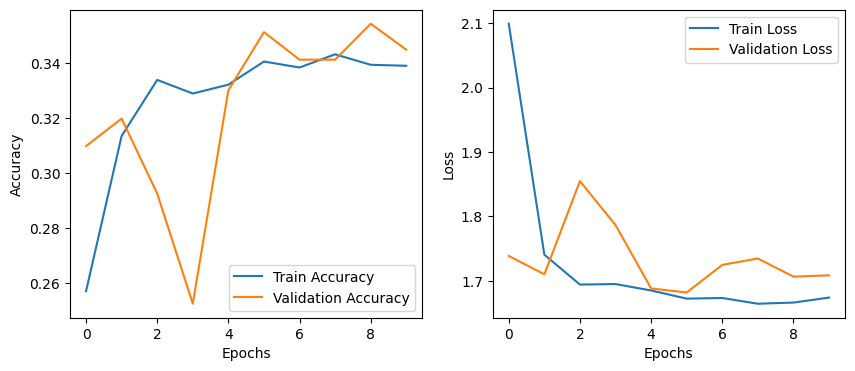

In [ ]:
def plot_history(history):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training/validation loss and accuracy
plot_history(history)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
def plot_sample_predictions(model, X_test, y_test, classes, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    random_indices = np.random.randint(0, len(X_test), size=num_samples)
    for i, idx in enumerate(random_indices):
        img = X_test[idx].reshape(48, 48)
        y_true = classes[y_test[idx]]
        y_pred = classes[np.argmax(model.predict(X_test[idx].reshape(1, 48, 48, 1)), axis=1)[0]]
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {y_true}\nPred: {y_pred}')
        axes[i].axis('off')
    plt.show()


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


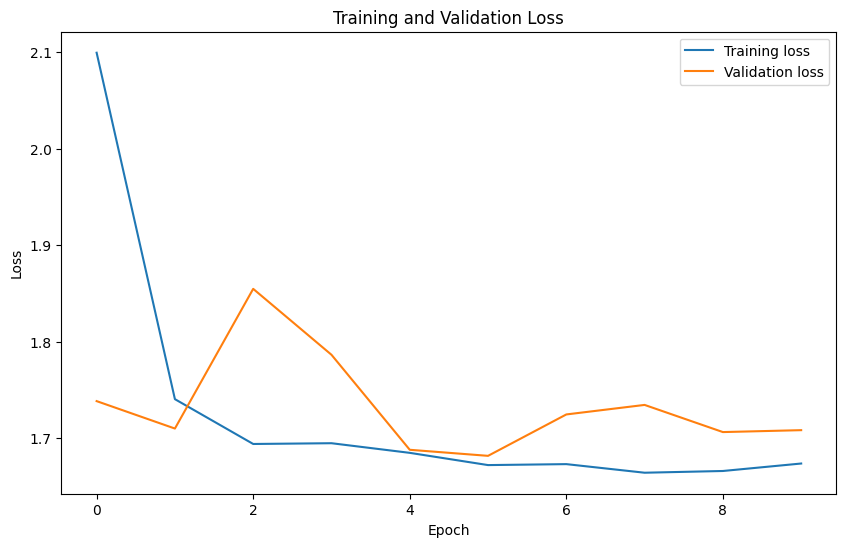

113/113 [==============================] - 1s 10ms/step


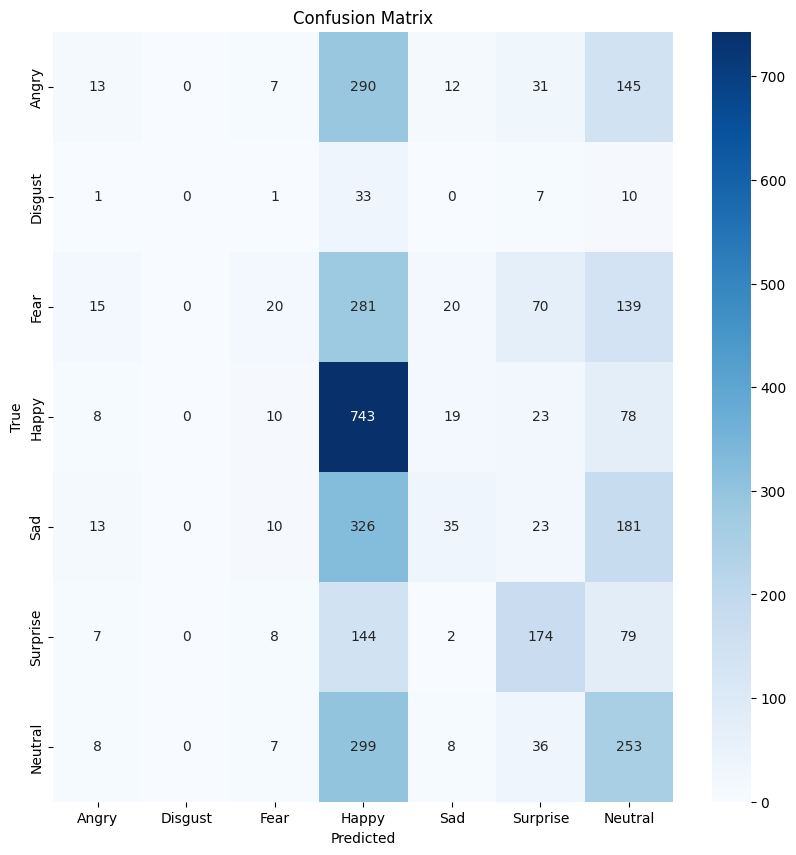

              precision    recall  f1-score   support

       Angry       0.20      0.03      0.05       498
     Disgust       0.00      0.00      0.00        52
        Fear       0.32      0.04      0.07       545
       Happy       0.35      0.84      0.50       881
         Sad       0.36      0.06      0.10       588
    Surprise       0.48      0.42      0.45       414
     Neutral       0.29      0.41      0.34       611

    accuracy                           0.34      3589
   macro avg       0.29      0.26      0.21      3589
weighted avg       0.33      0.34      0.26      3589



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Constants for the FER2013 dataset
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Plot training and validation accuracy
# plot_accuracy(history)

# Plot training and validation loss
plot_loss(history)

# Plot confusion matrix
# Plot confusion matrix
y_true = y_test
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)
plot_confusion_matrix(y_true, y_pred, emotion_labels)


# Print classification report
print(classification_report(y_true, y_pred, target_names=emotion_labels))




In [ ]:
plot_sample_predictions(mlp_model, X_test, y_true, emotion_labels)
def plot_sample_predictions(model, X, y_true, classes, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    random_indices = np.random.randint(0, len(X), size=num_samples)
    for i, idx in enumerate(random_indices):
        img = X[idx].reshape(48, 48)
        true_emotion = classes[y_true[idx]]
        pred_emotion = classes[np.argmax(model.predict(X[idx].reshape(1, 48, 48, 1)))]
        title = f"True: {true_emotion}\nPred: {pred_emotion}"
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()


1/1 [==============================] - 0s 40ms/step


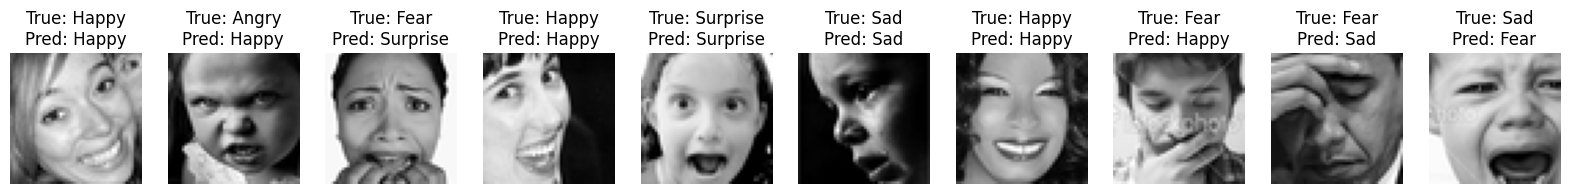

In [ ]:
plot_sample_predictions(mlp_model, X_test, y_true, emotion_labels)
